# [Dacon_당뇨병 위험 분류 예측](https://dacon.io/competitions/open/236068/overview/description)

- 평가 산식 : ACCURACY
- 컬럼 종류
    - Pregnancies : 임신 횟수
    - Glucose : 포도당 부하 검사 수치
    - BloodPressure : 혈압(mm Hg)
    - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
    - Insulin : 혈청 인슐린(mu U/ml)
    - BMI : 체질량지수
    - DiabetesPedigreeFunction : 당뇨 내력 가중치 값
    - Age : 나이
    - Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)

## 1. 데이터 살펴보기

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
df = pd.read_csv(os.getcwd() + '/data/diabetes/train.csv').drop(columns=['ID'], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,103,60,33,192,24.0,0.966,33,0
1,10,133,68,0,0,27.0,0.245,36,0
2,4,112,78,40,0,39.4,0.236,38,0
3,1,119,88,41,170,45.3,0.507,26,0
4,1,114,66,36,200,38.1,0.289,21,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               652 non-null    int64  
 1   Glucose                   652 non-null    int64  
 2   BloodPressure             652 non-null    int64  
 3   SkinThickness             652 non-null    int64  
 4   Insulin                   652 non-null    int64  
 5   BMI                       652 non-null    float64
 6   DiabetesPedigreeFunction  652 non-null    float64
 7   Age                       652 non-null    int64  
 8   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 46.0 KB


In [10]:
# 중복 행 개수
df.duplicated().sum()

0

In [16]:
# 결측치 확인
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

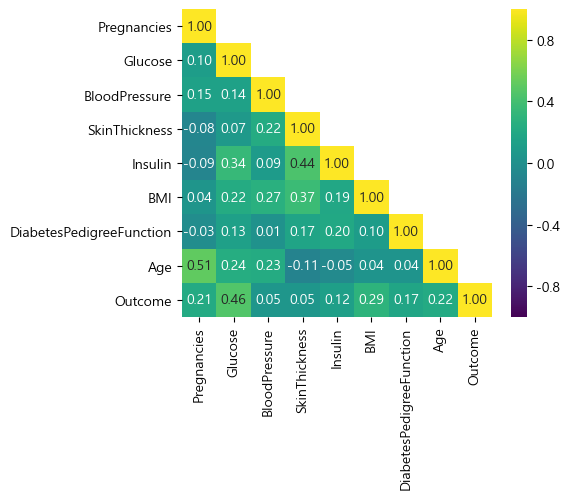

In [10]:
# 상관행렬 히트맵
plt.figure(figsize=(5,4))
df_corr = df.corr()
up_mask = np.triu(np.ones(df_corr.shape), k=1).astype(np.bool_)
sns.heatmap(df_corr, vmax=1, vmin=-1, annot = True, fmt='.2f', cmap='viridis', mask=up_mask)
plt.show()

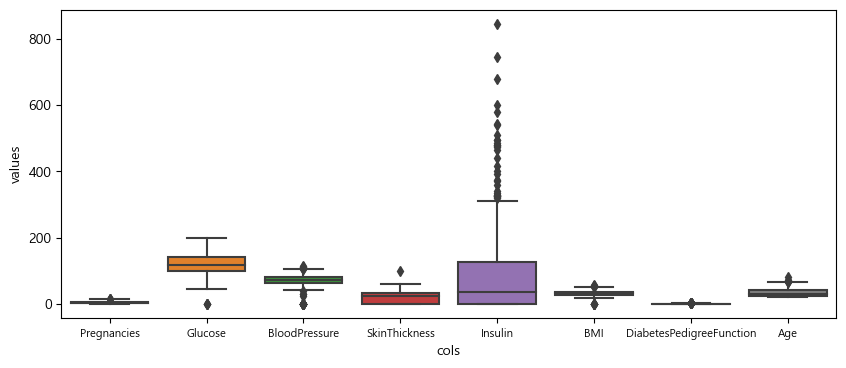

In [17]:
# 독립변수 상자그림
df_v1 = pd.melt(df.drop('Outcome', axis=1), var_name='cols', value_name='values')
plt.figure(figsize=(10, 4))
plt.xticks(fontsize=8)
sns.boxplot(data=df_v1,x = 'cols', y='values');

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.923313,120.946319,68.895706,20.440184,80.878834,31.947393,0.465133,33.510736,0.349693
std,3.327529,31.992394,19.183843,15.918604,117.748315,7.460975,0.329496,11.824817,0.477239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.363000,29.500000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,126.000000,36.425000,0.607750,41.000000,1.000000
max,15.000000,199.000000,114.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


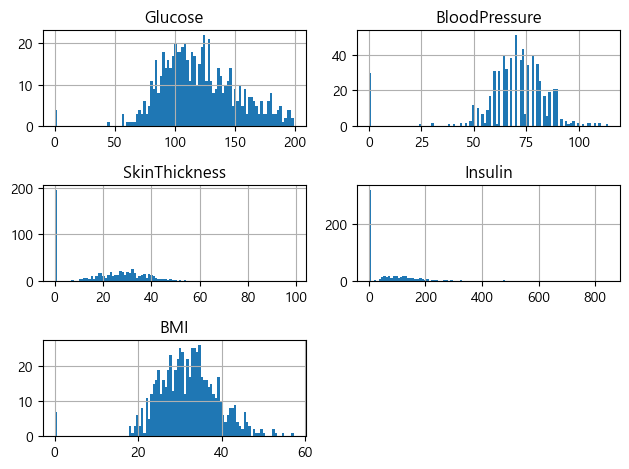

In [36]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(bins=100)
plt.tight_layout();

In [38]:
# 0값이 많이 존재하는 컬럼의 0값을 평균으로 대체
zero_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
mean_zero_cols = df[zero_cols].mean()
df[zero_cols] = df[zero_cols].replace(0, mean_zero_cols)

In [17]:
# 종속변수 범주별 개수 확인
df.Outcome.value_counts()

0    424
1    228
Name: Outcome, dtype: int64

[해석]
1. 결측치 존재 여부
	- 결측치는 존재하지 않는 것으로 파악하였음.
1. 데이터 타입 설명
	- 종속변수는 int형, 나머지 독립변수는 int형과 float형으로 구성되어 있음.
1. 종속변수와 독립변수의 상관관계
	- 상관행렬 히트맵으로 시각화한 결과, 종속변수와 독립변수 간에 강한 상관성은 없었음.
1. 독립변수 상관관계
	- 독립변수끼리의 상관관계를 확인해본 결과, 다중공선성을 걱정할 만큼 독립변수끼리의 상관성이 큰 변수는 존재하지 않았음.
1. 종속변수 분포 파악
	- 0 값이 424, 1 값이 228로 데이터 불균형 문제가 발생할 수 있으며, 이를 방지하기 위해 오버샘플링 또는 언더샘플링을 진행해야 할 것임.
1. df.describe() 함수 실행 결과, 최솟값이 0인 컬럼들이 다수 존재한다. 예를 들어 Glucose 컬럼은 포도당 수치인데 최솟값이 0인 것을 말이 안되므로 이러한 분포를 보인 컬럼들의 0값을 평균으로 대체하였다.

## 2. EDA
### 1) z-test
- 귀무가설: 포도당 농도는 100이다.
- 대립가설: 포도당 농도는 100이 아니다.

[해석]
- p-value < 0.05 이므로 귀무가설을 기각함.
- 신뢰구간에 mean0(=100)가 포함하지 않으므로(귀무가설 기각) z-test의 결과과 일치한다고 할 수 있음.

In [41]:
import scipy.stats as stats
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)
    
    z = (s_mean - mean0) / np.sqrt(p_var / n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설 채택')
    else: print('귀무가설 기각')
        
    if z < 0: 
        p = rv.cdf(z)*2
    else: p = (1-rv.cdf(z))*2
    
    print(f'p값은 {p:.3f}')
    
np.random.seed(100) # seed 값 고정
z_sample = np.random.choice(df.Glucose, 100) # 100개의 표본 추출
pmean_test(z_sample, 100, np.var(z_sample)) # z-검정 수행

# 신뢰구간 계산(유의수준 95%)
print('신뢰구간: ', stats.norm.interval(alpha=0.95, loc=np.mean(z_sample), scale = stats.sem(z_sample)))

귀무가설 기각
p값은 0.000
신뢰구간:  (116.6621215998543, 129.27787840014568)


### 2) 일표본 t-test
- 귀무가설: 포도당 농도는 112이다.
- 대립가설: 포도당 농도는 112이 아니다.

[해석]
- p-value > 0.05 이므로 귀무가설을 기각할 수 없음.
- 신뢰구간에 mean0(=112)가 포함하므로(귀무가설 기각 못함) t-test의 결과과 일치한다고 할 수 있음.

In [42]:
np.random.seed(2023) # seed 값 고정
t_sample = np.random.choice(df.Glucose, 15) # 15개의 표본 추출

# 정규성 검정
import scipy.stats as stats
stats.shapiro(t_sample) # 정규성을 만족하지 않음.
    
# 윌콕슨 부호 순위 검정
v, p = stats.wilcoxon(t_sample - 112)
if p < 0.05: print('(윌콕슨 부호 순위 검정) 귀무가설 기각')
else: print('(윌콕슨 부호 순위 검정) 귀무가설 기각 못함.')

# 일표본 t-검정
t_value, p_value = stats.ttest_1samp(t_sample, popmean=112)
if p_value < 0.05: print('(일표본t-test) 귀무가설 기각')
else: print('(일표본t-test) 귀무가설 기각 못함.')
    
# 신뢰구간 계산(유의수준 95%)
print('신뢰구간:', stats.t.interval(alpha=0.95, df=len(t_sample)-1, loc=np.mean(t_sample), scale=stats.sem(t_sample)))

(윌콕슨 부호 순위 검정) 귀무가설 기각 못함.
(일표본t-test) 귀무가설 기각 못함.
신뢰구간: (103.86092853151503, 127.20573813515163)


### 3) 독립표본 t-test
- 귀무가설: 두 집단 간 평균 차이가 없다.
- 대립가설: 두 집단 간 평균 차이가 있다.

[해석]
- p-value > 0.05 이므로 귀무가설을 기각할 수 없음.
- 신뢰구간에 diff_mean(=-5.0249)가 포함하므로(귀무가설 기각 못함) t-test의 결과과 일치한다고 할 수 있음.

In [43]:
np.random.seed(200) # seed 값 고정
bmi_0 = np.random.choice(df.loc[df['Outcome']==0, 'BMI'], 20) # 20개의 표본 추출
bmi_1 = np.random.choice(df.loc[df['Outcome']==1, 'BMI'], 20) # 20개의 표본 추출

stats.shapiro(bmi_0) # 정규성 만족 못함.
stats.shapiro(bmi_1) # 정규성 만족 못함.
stats.levene(bmi_0, bmi_1) # 등분산성 만족 못함.

# 윌콕슨 순위합 검정
statistic, p = stats.mannwhitneyu(bmi_0, bmi_1)
if p_value < 0.05: print('(윌콕슨 순위합 검정) 귀무가설 기각')
else: print('(윌콕슨 순위합 검정) 귀무가설 기각 못함.')
    
# 독립표본 t-test
statistic, p = stats.ttest_ind(bmi_0, bmi_1, equal_var=False)
if p_value < 0.05: print('(독립표본 t-test) 귀무가설 기각')
else: print('(독립표본 t-test) 귀무가설 기각 못함.')
    
def sp(data1, data2):
    df = len(data1) + len(data2)-2
    s1 = (len(data1)-1) * (data1.std()**2)
    s2 = (len(data2)-1) * (data2.std()**2)
    sp = np.sqrt((s1+s2)/df)
    return sp

alpha=0.95
dof = len(bmi_0) + len(bmi_1) - 2
diff_mean = np.mean(bmi_0) - np.mean(bmi_1)
s = sp(bmi_0, bmi_1)*(1/len(bmi_0) + 1/len(bmi_1))
ci = stats.t.interval(alpha, dof, loc=diff_mean, scale=s)

# 신뢰구간 계산(유의수준 95%)
print('신뢰구간:', ci)
print('diff_mean:', diff_mean)

(윌콕슨 순위합 검정) 귀무가설 기각 못함.
(독립표본 t-test) 귀무가설 기각 못함.
신뢰구간: (-6.414490203589484, -3.635509796410514)
diff_mean: -5.024999999999999


### 4) 이항 로지스틱 회귀분석
- 회귀계수 유의성 검정 결과, BloodPressure, SkinThickness, Insulin, Age 4개 변수가 유의수준 0.05 하에서 유의하지 않는 것으로 나타났음.
    - Pregnancies, Glucose, BMI, DiabetesPedigreeFunction 변수는 종속변수와 양의 상관성이 있음.
    - Pregnancies(임신횟수)가 1 증가하면 당뇨병에 걸리 확률이 그렇지 않을 확률에 비해 1.136103배 증가함.
    - Glucose(포도당 농도)가 1 증가하면 당뇨병에 걸리 확률이 그렇지 않을 확률에 비해 1.039702배 증가함.
    - BMI가 1 증가하면 당뇨병에 걸리 확률이 그렇지 않을 확률에 비해 1.107052배 증가함.
    - DiabetesPedigreeFunction가 1 증가하면 당뇨병에 걸리 확률이 그렇지 않을 확률에 비해 2.701998배 증가함.

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm("Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness \
                + Insulin + BMI + DiabetesPedigreeFunction + Age", data=df,
               family = sm.families.Binomial()).fit()

print(model.summary())
print()
print(np.exp(model.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  652
Model:                            GLM   Df Residuals:                      643
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -303.73
Date:                Tue, 27 Jun 2023   Deviance:                       607.46
Time:                        14:55:17   Pearson chi2:                     618.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3043
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### 5) 비계층적 군집분석
#### (1) KMeans

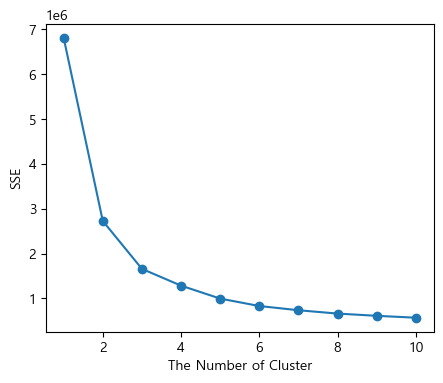

[6815696.540732062, 2727067.74974501, 1657878.3752639194, 1283951.071957886, 994730.776823182, 829274.1195478968, 734890.0313059824, 660547.756949671, 610658.2258406255, 568139.257722153]


In [45]:
from sklearn.cluster import KMeans
X = df.drop(columns=['Outcome'], axis=1)

def elbow(X):
    sse=[]
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.figure(figsize=(5,4))
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Cluster')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(X)

[해석]
- elbow 기법을 적용하여 시각화한 결과, k 값이 2에서 3으로 갈 때에 기울기 소실이 발생하므로, 해당 데이터는 2~3개의 군집이 적절함을 알 수 있음.
- 본 분석에서는 k 값을 2로 지정하였음.

In [46]:
# 최적의 k로 K-Means 군집화 실행
km = KMeans(n_clusters=2, random_state=1)
km.fit(X)

# 할당된 군집을 df1 데이터에 추가
df1 = df.drop(columns=['Outcome'], axis=1).copy()
new_lables = km.labels_
df1['cluster'] = new_lables

df1.groupby(['cluster']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
cluster,,,,,,,,
0,3.750000,156.326923,72.307692,31.211538,387.019231,35.359615,0.596365,33.923077
1,3.938333,118.686309,72.044785,26.149726,97.212449,32.024386,0.453760,33.475000


[해석]
- 그룹 간 차이를 보이는 큰 변수는 Glucose, SkinThickness, Insulin, BMI으로 나타남.

In [47]:
# 실루엣 분석을 이용한 군집화 평가 진행
## 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
## 효율적으로 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 것임.

# 모든 개별 데이터에 실루엣 계수 값을 구함.
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples=silhouette_samples(X, df1.cluster)

# df1에 실루엣 계수 칼럼 추가
df1['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(X, df1.cluster)
print('Silhouette Analysis Score: {:.3f}'.format(average_score))
df1.head()

Silhouette Analysis Score: 0.734


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster,silhouette_coeff
0,4,103.0,60.0,33.000000,192.000000,24.0,0.966,33,1,0.485967
1,10,133.0,68.0,20.440184,80.878834,27.0,0.245,36,1,0.833761
2,4,112.0,78.0,40.000000,80.878834,39.4,0.236,38,1,0.834925
3,1,119.0,88.0,41.000000,170.000000,45.3,0.507,26,1,0.596955
4,1,114.0,66.0,36.000000,200.000000,38.1,0.289,21,1,0.429716


In [48]:
df1.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.434625
1    0.759588
Name: silhouette_coeff, dtype: float64

[해석]
- 평균 실루엣 계수 값은 약 0.734이고, 상위 5개 데이터만 뽑은 결과에서 그룹 1의 실루엣 계수 값의 범위가 최소 0.429716에서 최대 0.834925로 다양하게 나타남.
- 또한 군집별 평균 실루엣 계수 값을 확인한 결과, 그룹 0의 평균 실루엣 계수 값은 0.434625, 그룹 1은 0.759588로 나타남.
- 값이 1에 가까울수록 군집이 잘 됐다는 것인데, 그룹 0은 군집이 잘 되었다고 할 수 없음.

#### (2) 혼합 군집 분포
- 모형을 기준으로 데이터를 군집하며, 각 데이터와 k개의 혼합 분포 중 어느 모형으로부터 나왔을 확률이 높은지에 따라 군집의 분류가 이뤄짐.
- 즉, 각 데이터는 k개의 모수적 모형에서 왔고, 각각의 데이터들의 k개의 모형에 속할 확률을 구해서 군집화 함.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

df2 = df.copy().drop(columns='Outcome')

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# 가우시안 혼합모델 구축
gmm = GaussianMixture(n_components=2)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)

df2['gmm_cluster'] = gmm_labels

# 군집의 변수별 통계량 확인
clusters = [0, 1]
df2.groupby('gmm_cluster').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
gmm_cluster,,,,,,,,
0,3.792453,132.833760,73.199213,29.962895,177.841521,33.434697,0.620226,37.841509
1,4.012920,114.056431,71.289612,24.218782,80.941773,31.506814,0.358933,30.545220


[해석]
- 혼합 군집 분석에서 총 2개의 군집으로 설정하였으며, 그룹 1보다 그룹 0의 변수 평균값이 대부분 높게 나옴.

#### (3) DBSCAN

In [50]:
from  sklearn.cluster import DBSCAN

X = df.drop(columns=['Outcome'], axis=1)
df3 = df.copy().drop(columns='Outcome')

dbscan = DBSCAN(eps=0.6, min_samples=8, metric = 'euclidean')
dbscan_lables = dbscan.fit_predict(X)

df3['dbscan_cluster'] = dbscan_lables
df3['target'] = df.Outcome

df3_result = df3.groupby(['target'])['dbscan_cluster'].value_counts()
print(df3_result)

target  dbscan_cluster
0       -1                424
1       -1                228
Name: dbscan_cluster, dtype: int64


[해석]
- dbscan_cluster 값을 보면 -1이 군집 레이블로 있는 것을 알 수 있는데, 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미함.
- 따라서 위 당뇨병 데이터가 모두 노이즈로 분류되었음을 알 수 있음.

## 3. 모델 구현
#### 문제1: 데이터 불균형을 시각화하여 식별하고 불균형 판단 근거를 작성하시오.
- 0값이 1값보다 많이 분포됐기 때문에 데이터 불균형이라고 판단하였음.

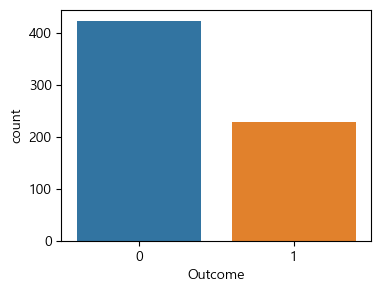

In [51]:
plt.figure(figsize=(4,3))
sns.countplot(x = df.Outcome);

#### 문제2: 오버샘플링, 언더샘플링 기법을 설명하고 두 기법 중 하나를 선택하고, 선택한 이유를 작성하시오.
- 오버샘플링:소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만틈 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다.
    - 랜덤 오버 샘플링: 소수의 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비율을 맞추는 방법이다. 데이터를 단순 복제하기 때문에 분포는 변하지 않지만 그 수가 늘어나 같은 비율로 가중치를 받을 수 있다.
    - SMOTE 기법: 소수 레이블을 지닌 데이터세트의 관측값에 대한 K개의 최근접 이웃을 찾고, 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플 수를 늘리는 방법이다.
- 언더샘플링: 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소기키는 방법이다.
    - 랜덤 언더 샘플링: 다수를 차지하는 레이블에서 무작위로 데이터를 제거하는 방법이다. 다수의 클래스 데이터를 제거하므로 계산 시간이 감소하고 클래스 오버랩을 감소시킨다. 하지만 데이터를 제거하기 때문에 정보 손실이 발생한다.
- 본 분석에서는 데이터 손실을 막기 위해 오버 샘플링 기법을 활용한다.

#### 문제3: 원데이터를 포함해 샘플링 기법을 적용한 데이터 세트를 구성하시오.

In [53]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

X = df.drop(columns=['Outcome'], axis=1)
y = df.Outcome

undersample = RandomOverSampler()
smote = SMOTE()

X_ro, y_ro = undersample.fit_resample(X, y)
X_sm, y_sm = smote.fit_resample(X, y)

print('<원본 y 클래스> \n', y.value_counts())
print('<랜덤 오버 샘링 y 클래스> \n', pd.Series(y_ro).value_counts())
print('<smote y 클래스> \n', pd.Series(y_sm).value_counts())

<원본 y 클래스> 
 0    424
1    228
Name: Outcome, dtype: int64
<랜덤 오버 샘링 y 클래스> 
 1    424
0    424
dtype: int64
<smote y 클래스> 
 1    424
0    424
dtype: int64


#### 문제4: 오버샘플링 데이터와 원데이터를 포함해 모델을 비교하고 성능을 측정하시오.

time: 0.3291904926300049 sec


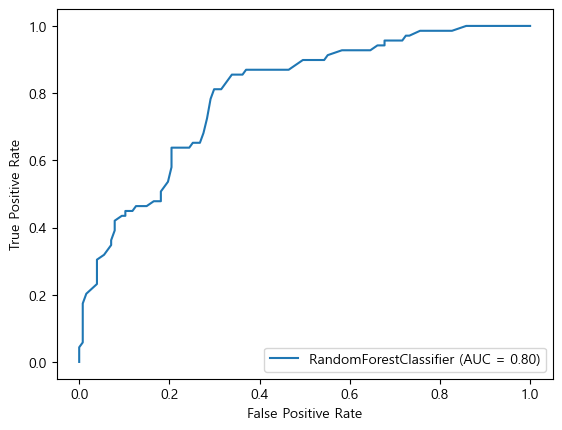

In [54]:
# 원본 데이터
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
import time

start=time.time()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, stratify=y, test_size=.3)

# 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 모델 학습
rfr = RandomForestClassifier(random_state=100)
rfr.fit(X_train_sc, y_train)

# roc 곡선 및 auc 스코어
plot_roc_curve(rfr, X_test_sc, y_test)
print(f'time: {time.time() - start} sec')

time: 0.3597996234893799 sec


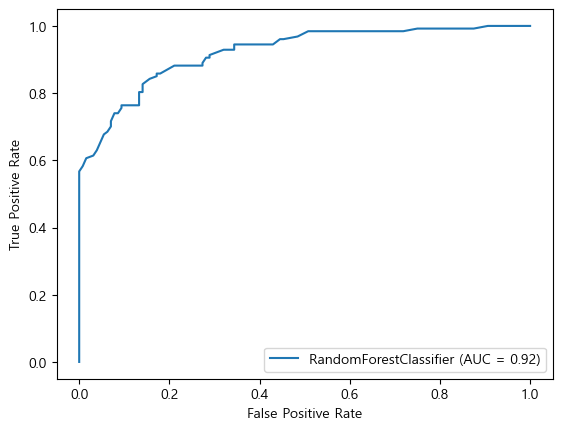

In [55]:
# 랜덤 오버 샘플링 데이터
start=time.time()

# 데이터 분할
X_ro_train, X_ro_test, y_ro_train, y_ro_test = train_test_split(X_ro, y_ro, random_state=100, stratify=y_ro, test_size=.3)

# 스케일링
scaler = StandardScaler()
X_ro_train_sc = scaler.fit_transform(X_ro_train)
X_ro_test_sc = scaler.transform(X_ro_test)

# 모델 학습
rfr = RandomForestClassifier(random_state=100)
rfr.fit(X_ro_train_sc, y_ro_train)

# roc 곡선 및 auc 스코어
plot_roc_curve(rfr, X_ro_test_sc, y_ro_test)
print(f'time: {time.time() - start} sec')

time: 0.3628096580505371 sec


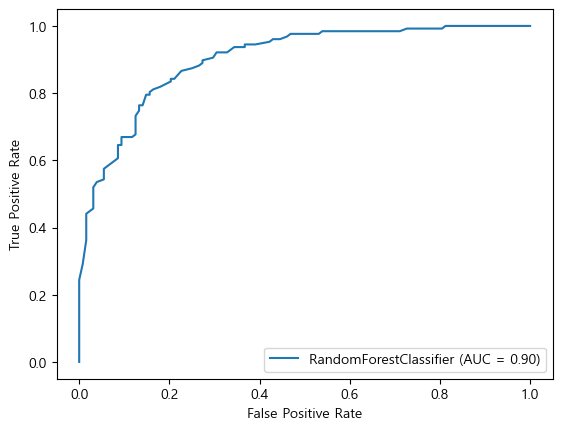

In [56]:
# SMOTE 데이터
start=time.time()

# 데이터 분할
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, random_state=100, stratify=y_sm, test_size=.3)

# 스케일링
scaler = StandardScaler()
X_sm_train_sc = scaler.fit_transform(X_sm_train)
X_sm_test_sc = scaler.transform(X_sm_test)

# 모델 학습
rfr = RandomForestClassifier(random_state=100)
rfr.fit(X_sm_train_sc, y_sm_train)

# roc 곡선 및 auc 스코어
plot_roc_curve(rfr, X_sm_test_sc, y_sm_test)
print(f'time: {time.time() - start} sec')

#### 문제5: 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.
- 처리 속도 측면에서 보았을 때, 오버 샘플링 기법을 적용한 모델이 원보 데이터를 이용한 모델보다 조금 더 오래 걸렸다. 이는 오버 샘플링을 통해 데이터가 증가하였기에 발생한 현상이라 판단할 수 있다.
- AUC 스코어는 값이 클수록 성능이 좋다고 할 수 있는데, 랜덤 오버 샘플링을 적용한 스코어 값이 0.92로 가장 높았으며, 원본 데이터를 이용한 모델의 값은 0.80로 가장 낮았다.
- 따라서 오버 샘플링은 분석 정확도에 긍정적인 영향을 주었다는 것을 알 수 있다.

---
### ↓ 경진대회를 위한 모델 구현

In [57]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Outcome'], axis=1)
y = df.Outcome

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=123, stratify=y_sm)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc.shape)
print(X_test_sc.shape)
print(y_train.shape)
print(y_test.shape)

(636, 8)
(212, 8)
(636,)
(212,)


In [58]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

## 모델 학습
lasso = Lasso(random_state=100)
lasso.fit(X_train_sc, y_train)

## 예측값 계산
pred = lasso.predict(X_test_sc)
preds_1d = pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다 크면 1, 작으면 0

print('테스트 정확도: ', accuracy_score(y_test, pred_class))

테스트 정확도:  0.5


In [59]:
# 릿지 회귀
from sklearn.linear_model import Ridge

## 모델 학습
ridge = Ridge(random_state=100)
ridge.fit(X_train_sc, y_train)

## 예측값 계산
pred = ridge.predict(X_test_sc)
preds_1d = pred.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다 크면 1, 작으면 0

print('테스트 정확도: ', accuracy_score(y_test, pred_class))

테스트 정확도:  0.7405660377358491


In [60]:
# SVM
from sklearn.svm import SVC

## 모델 학습
svm = SVC(random_state=100)
svm.fit(X_train_sc, y_train)

## 예측값 계산
pred = svm.predict(X_test_sc)
print('테스트 정확도: ', accuracy_score(y_test, pred))

테스트 정확도:  0.7783018867924528


In [61]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

## 모델 학습
rfr = RandomForestClassifier(random_state=100, n_estimators=300, max_depth=5,  min_samples_split=3)
rfr.fit(X_train_sc, y_train)

## 예측값 계산
pred = rfr.predict(X_test_sc)
print('테스트 정확도: ', accuracy_score(y_test, pred))

테스트 정확도:  0.7830188679245284


In [62]:
# 보팅(Voting)
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## 개별 모델 및 소프트 보팅 기반의 앙상블 모델 구현
lr_clf = LogisticRegression(random_state=100, solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=6)
vo_clf = VotingClassifier(estimators = [('lr', lr_clf), ('KNN', knn_clf)], voting='soft')

## 모델 학습
vo_clf.fit(X_train_sc, y_train)
pred = vo_clf.predict(X_test_sc)
print('voting 모델의 테스트 정확도: ', accuracy_score(y_test, pred))

## 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train_sc, y_train)
    pred = classifier.predict(X_test_sc)
    class_name = classifier.__class__.__name__
    print('{} 모델의 테스트 정확도: {:.4f}'.format(class_name, accuracy_score(y_test, pred)))

voting 모델의 테스트 정확도:  0.7452830188679245
LogisticRegression 모델의 테스트 정확도: 0.7311
KNeighborsClassifier 모델의 테스트 정확도: 0.7264


In [63]:
# 배깅
from sklearn.ensemble import BaggingClassifier

## 모델 학습
bagging_clf = BaggingClassifier(random_state=100, oob_score=True)
bagging_clf.fit(X_train_sc, y_train)

## 예측값 계산
pred = bagging_clf.predict(X_test_sc)
print('테스트 정확도: ', accuracy_score(y_test, pred))

테스트 정확도:  0.7688679245283019


In [64]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## 모델 학습
param_grid = [{'max_depth': [2, 4, 6, 8, 10]}]
xgb_clf = GridSearchCV(estimator=XGBClassifier(n_estimators = 100), cv=5, param_grid=param_grid)
xgb_clf.fit(X_train_sc, y_train)

## 예측값 계산
pred = xgb_clf.best_estimator_.predict(X_test_sc)
print('테스트 정확도: ', accuracy_score(y_test, pred))

[15:04:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:15] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

## 4. 예측값 도출

In [65]:
test = pd.read_csv(os.getcwd() + '/data/diabetes/test.csv').drop(columns=['ID'], axis=1)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5,112,66,0,0,37.8,0.261,41
1,3,107,62,13,48,22.9,0.678,23
2,3,113,44,13,0,22.4,0.140,22
3,6,190,92,0,0,35.5,0.278,66
4,1,107,72,30,82,30.8,0.821,24


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               116 non-null    int64  
 1   Glucose                   116 non-null    int64  
 2   BloodPressure             116 non-null    int64  
 3   SkinThickness             116 non-null    int64  
 4   Insulin                   116 non-null    int64  
 5   BMI                       116 non-null    float64
 6   DiabetesPedigreeFunction  116 non-null    float64
 7   Age                       116 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 7.4 KB


In [66]:
# 예측값 도출
test_pred = xgb_clf.predict(test)

# 제출 데이터 불러오기
sub_df = pd.read_csv(os.getcwd() + '/data/diabetes/sample_submission.csv')

# 예측값 대입
sub_df['Outcome'] = test_pred

# 제출 데이터 저장
sub_df.to_csv(os.getcwd() + '/data/diabetes/result1.csv', index=False)